<a href="https://colab.research.google.com/github/ferdianpradana/Tugas_AI/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-11-16 15:48:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.12.240, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   135MB/s    in 0.5s    

2021-11-16 15:48:08 (135 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [49]:
import os
import zipfile

local_zip = '/tmp/daun_pandan_daun_kemangi.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [54]:
base_dir = '/tmp/daun_pandan_daun_kemangi'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'daun_pandan')
train_dogs_dir = os.path.join(train_dir, 'daun_kemangi')

validation_cats_dir = os.path.join(validation_dir, 'daun_pandan')
validation_dogs_dir = os.path.join(validation_dir, 'daun_kemangi')

In [55]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_cats_dir)[:10])
print(os.listdir(train_dogs_dir)[:10])

['021.jpg', '011.jpg', '003.jpg', '023.jpg', '012.jpg', '014.jpg', '028.jpg', '039.jpg', '033.jpg', '007.jpg']
['068.jpg', '087.jpg', '057.jpg', '051.jpg', '074.jpg', '081.jpg', '056.jpg', '075.jpg', '060.jpg', '065.jpg']


In [56]:
# Cek jumlah data train dan data validation
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 40
total training dog images: 40
total validation cat images: 20
total validation dog images: 20


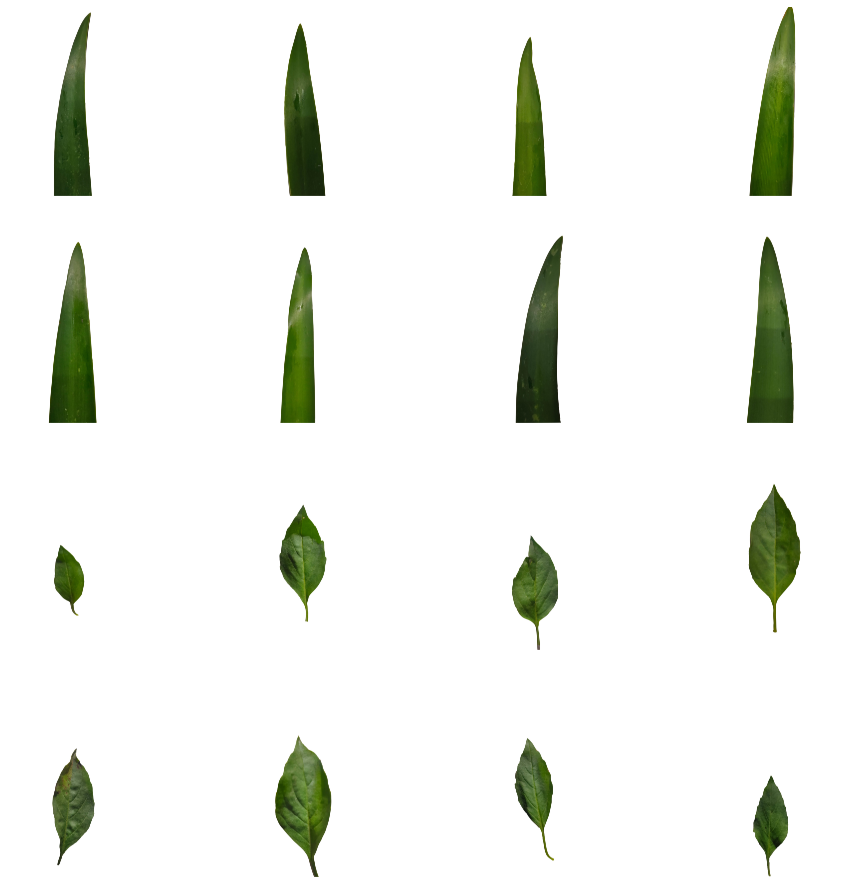

In [57]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in os.listdir(train_cats_dir)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in os.listdir(train_dogs_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [58]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [59]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [60]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (80, 150, 150, 3)
Train Label =  (80,)
Validation Data =  (40, 150, 150, 3)
Validation Label =  (40,)


In [61]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [62]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  []
Label setelah di-encoder  []


In [63]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [64]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [65]:
# Tampilkan model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_2 (Flatten)         (None, 67500)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               8640128   
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [66]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [67]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 111ms/step - loss: 26.1460 - acc: 0.5750 - val_loss: 48.1748 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 58ms/step - loss: 23.4326 - acc: 0.5250 - val_loss: 14.3264 - val_acc: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 60ms/step - loss: 9.6069 - acc: 0.6125 - val_loss: 0.1596 - val_acc: 0.9750
Epoch 4/50
4/4 [==============================] - 0s 67ms/step - loss: 3.1821 - acc: 0.7750 - val_loss: 1.4130 - val_acc: 0.8000
Epoch 5/50
4/4 [==============================] - 0s 59ms/step - loss: 0.0317 - acc: 0.9750 - val_loss: 1.2928 - val_acc: 0.8500
Epoch 6/50
4/4 [==============================] - 0s 61ms/step - loss: 0.6868 - acc: 0.8875 - val_loss: 2.4118e-06 - val_acc: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 64ms/step - loss: 0.1768 - acc: 0.9500 - val_loss: 0.7274 - val_acc: 0.9000
Epoch 8/50
4/4 [==============================] - 0s 58ms/step - loss: 0.2498 - acc: 0.9

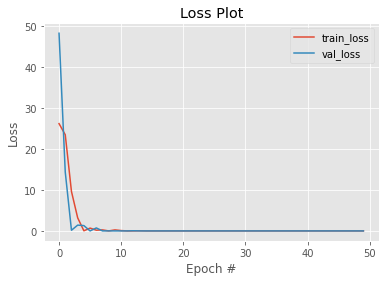

In [68]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

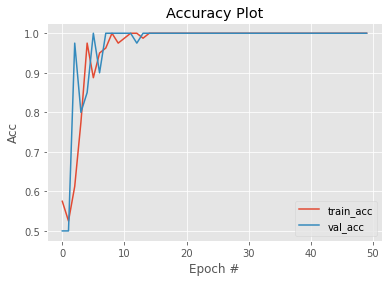

In [69]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

